# Lionel Messi Vs Cristiano Ronaldo #
## Who is the better player?##

Dataset: Soccer dataset downloaded from: https://www.kaggle.com/hugomathien/soccer

## Data Exploration ##


### Players' Information ###

In [9]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect('database.sqlite')
conn.row_factory = sqlite3.Row
cur = conn.cursor()
cur.execute("select * from Player where player_name = 'Lionel Messi' or player_name = 'Cristiano Ronaldo'")
players = cur.fetchall()
columnHeaders = players[0].keys()
print(columnHeaders)
for player in players:
    data = []
    for member in player:
        data.append(str(member))
    print(", ".join(data))

#Find Messi and Ronaldo's api_id
ronaldoApiID = players[0]['player_api_id']
messiApiID = players[1]['player_api_id']
#print(messiApiID, ronaldoApiID)
conn.close()


[]


### Players' Attributes ###


In [36]:
# Get average stats' of all players in the database
cnx = sqlite3.connect('database.sqlite')
allDF = pd.read_sql_query('SELECT * FROM Player_Attributes', cnx)

In [14]:
# get Ronaldo and Messi's attributes
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query('select * from Player_Attributes where player_api_id=%d or player_api_id=%d'
                       %(messiApiID, ronaldoApiID), conn)
df.columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [15]:
#Messi's stats
messi = df[df.player_api_id==messiApiID]
messi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,26.0,102495.500000,7.648529,102483.0,102489.25,102495.5,102501.75,102508.0
player_fifa_api_id,26.0,158023.000000,0.000000,158023.0,158023.00,158023.0,158023.00,158023.0
player_api_id,26.0,30981.000000,0.000000,30981.0,30981.00,30981.0,30981.00,30981.0
overall_rating,26.0,92.192308,2.545887,85.0,90.00,93.0,94.00,94.0
potential,26.0,95.230769,1.242826,93.0,94.25,95.0,96.00,97.0
crossing,26.0,83.346154,1.671940,80.0,82.25,84.0,84.00,85.0
finishing,26.0,92.230769,5.077855,76.0,91.25,93.5,94.75,97.0
heading_accuracy,26.0,69.269231,3.606191,59.0,69.00,71.0,71.00,73.0
short_passing,26.0,88.807692,0.749359,86.0,89.00,89.0,89.00,90.0
volleys,26.0,87.538462,2.044129,85.0,85.00,88.0,89.00,91.0


In [16]:
# Ronaldo's stats
ronaldo = df[df.player_api_id==ronaldoApiID]
ronaldo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,25.0,33343.00,7.359801,33331.0,33337.0,33343.0,33349.0,33355.0
player_fifa_api_id,25.0,20801.00,0.000000,20801.0,20801.0,20801.0,20801.0,20801.0
player_api_id,25.0,30893.00,0.000000,30893.0,30893.0,30893.0,30893.0,30893.0
overall_rating,25.0,91.28,1.541644,87.0,91.0,92.0,92.0,93.0
potential,25.0,93.48,1.045626,92.0,93.0,94.0,94.0,95.0
crossing,25.0,83.88,2.107922,80.0,83.0,83.0,84.0,89.0
finishing,25.0,91.12,4.850430,71.0,90.0,92.0,95.0,95.0
heading_accuracy,25.0,85.52,2.785678,74.0,86.0,86.0,87.0,88.0
short_passing,25.0,82.28,0.936305,81.0,82.0,82.0,83.0,84.0
volleys,25.0,85.56,0.916515,85.0,85.0,85.0,87.0,87.0


## Data cleaning - handling missing data ##

In [17]:
df.shape #51 entries for two players

(51, 42)

In [37]:
allDF.isnull().any().any(), allDF.shape

(True, (183978, 42))

In [38]:
allDF = allDF.dropna() # Drop the null rows

In [39]:
allDF.isnull().any().any(), allDF.shape

(False, (180354, 42))

In [21]:
# is any row NULL? Nope! So, no need to drop null values
df.isnull().any().any(), df.shape

(False, (51, 42))

In [22]:
# Removing id, player_fifa_api_id and player_api_id columns
del messi['id']
del messi['player_fifa_api_id']
del messi['player_api_id']
del ronaldo['id']
del ronaldo['player_fifa_api_id']
del ronaldo['player_api_id']

In [23]:
# Removing id, player_fifa_api_id and player_api_id columns from allDF
#del allDF['id']
#del allDF['player_fifa_api_id']
#del allDF['player_api_id']
#del allDF['date']


In [24]:
allDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall_rating,180354.0,68.635317,7.027950,33.0,64.0,69.0,73.0,94.0
potential,180354.0,73.479457,6.581963,39.0,69.0,74.0,78.0,97.0
crossing,180354.0,55.142071,17.247231,1.0,45.0,59.0,68.0,95.0
finishing,180354.0,49.962136,19.041760,1.0,34.0,53.0,65.0,97.0
heading_accuracy,180354.0,57.263476,16.478716,1.0,49.0,60.0,68.0,98.0
short_passing,180354.0,62.486726,14.172493,3.0,57.0,65.0,72.0,97.0
volleys,180354.0,49.488927,18.252319,1.0,35.0,52.0,64.0,93.0
dribbling,180354.0,59.265755,17.741351,1.0,52.0,64.0,72.0,97.0
curve,180354.0,53.001408,18.245476,2.0,41.0,56.0,67.0,94.0
free_kick_accuracy,180354.0,49.392783,17.820262,1.0,36.0,50.0,63.0,97.0


### Comparing and Visualizing Ronaldo and Messi's Stats ##

In [25]:
mMean = messi.mean()

In [26]:
#type(ronaldo.mean())
rMean = ronaldo.mean()

In [27]:
#allMean = allDF.mean() - This kills the kernel
#print(allMean)
allMean = allDF.describe().transpose()['mean']

In [ ]:
cols = ['overall_rating', 'potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [29]:
print(type(rMean), type(mMean), type(allMean))
rMean.name='Ronaldo'
mMean.name='Messi'
allMean.name = 'Average Player'

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [30]:
# Concat Ronaldo's and Messis's attribute Series into a dataframe
df = pd.concat([rMean, mMean], axis=1)
df.head()
#df.index

,Ronaldo,Messi
overall_rating,91.28,92.192308
potential,93.48,95.230769
crossing,83.88,83.346154
finishing,91.12,92.230769
heading_accuracy,85.52,69.269231


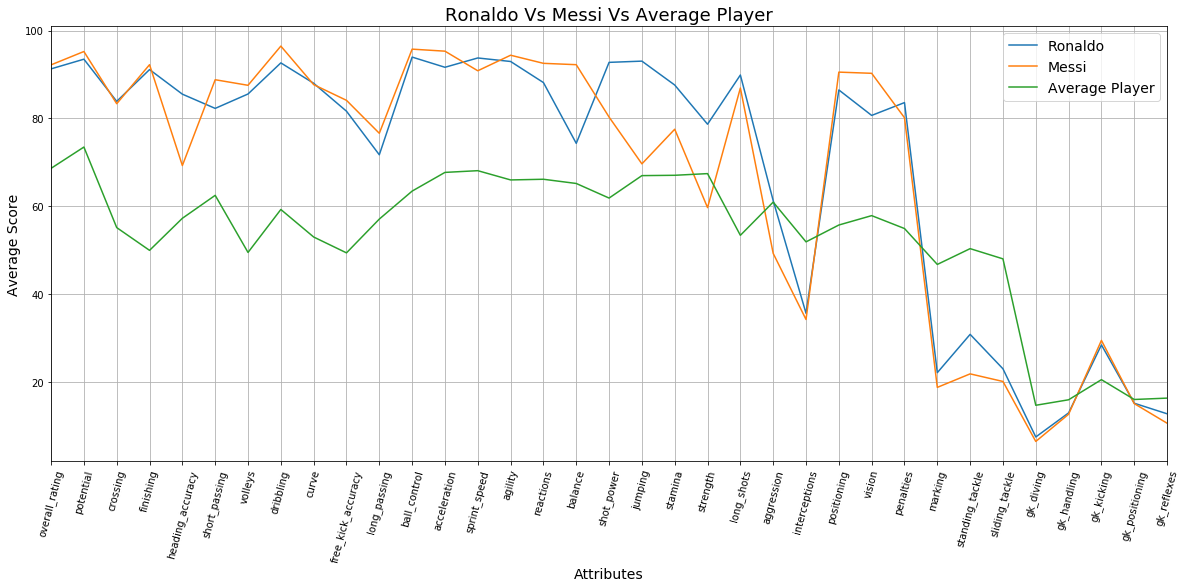

In [51]:
# For plotting the graph inside the notebook itself
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
plt.title('Ronaldo Vs Messi Vs Average Player', size=18)
#plt.suptitle('Ronaldo Vs Messi', size=18) # How do you set title??
labels = ['Ronaldo', 'Messi', 'Average Player']
ax = df['Ronaldo'].plot(ax=ax, kind='line', x='x', y='y')
ax = df['Messi'].plot(ax=ax, kind='line', x='x', y='y')
ax = allMean.plot(ax=ax, kind='line', x='x', y='y')
plt.ylabel('Average Score', size=14)
plt.xlabel('Attributes', size=14)
#df.plot.line(figsize=(20, 12), xticks=range(len(cols)), title='Ronaldo Vs Messi')
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=75)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best', prop={'size':14})
plt.grid(True)
plt.show()

## Top 10 Players based on Overall Rating ##

In [41]:
playersDF = pd.read_sql_query('SELECT * FROM Player', cnx) # Get all palyers' information

In [42]:
playersDF.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [40]:
allDF.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [45]:
avgRating = allDF[['player_api_id', 'overall_rating']].groupby(['player_api_id'], as_index=False).mean()

In [46]:
avgRating.head()

,player_api_id,overall_rating
0,2625,60.142857
1,2752,69.380952
2,2768,69.285714
3,2770,71.133333
4,2790,70.200000


In [48]:
playerRatings = playersDF.merge(avgRating, on='player_api_id', how='inner')
playerRatings.tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,overall_rating
10405,11069,192132,Zouhaier Dhaouadhi,195840,1988-01-01 00:00:00,180.34,159,64.000000
10406,11070,282473,Zouhair Feddal,205705,1989-01-01 00:00:00,190.50,172,65.761905
10407,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,74.384615
10408,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,65.687500
10409,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,80.000000


In [49]:
def getTopTenPlayers(ratings):
    """ Function to return the top 10 Players based on their overall ratings"""
    top10 = ratings.sort_values(by='overall_rating', ascending=False)
    return top10[['player_name', 'overall_rating']][:10]

In [50]:
top10 = getTopTenPlayers(playerRatings)
top10

,player_name,overall_rating
5800,Lionel Messi,92.192308
1866,Cristiano Ronaldo,91.280000
3291,Franck Ribery,88.458333
702,Andres Iniesta,88.320000
10393,Zlatan Ibrahimovic,88.285714
901,Arjen Robben,87.840000
10208,Xavi Hernandez,87.636364
10102,Wayne Rooney,87.222222
4082,Iker Casillas,86.954545
8085,Philipp Lahm,86.733333


In [61]:
def drawTop10BarChart(top10):
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.title('Top 10 Soccer Players', size=18)
    plt.ylabel("Player's Overall Rating", size=14)
    plt.xlabel("Player", size=14)
    ax = top10['overall_rating'].plot(kind='bar')
    ax.set_xticklabels(top10['player_name'], rotation=75)
    plt.grid(True)
    plt.show()

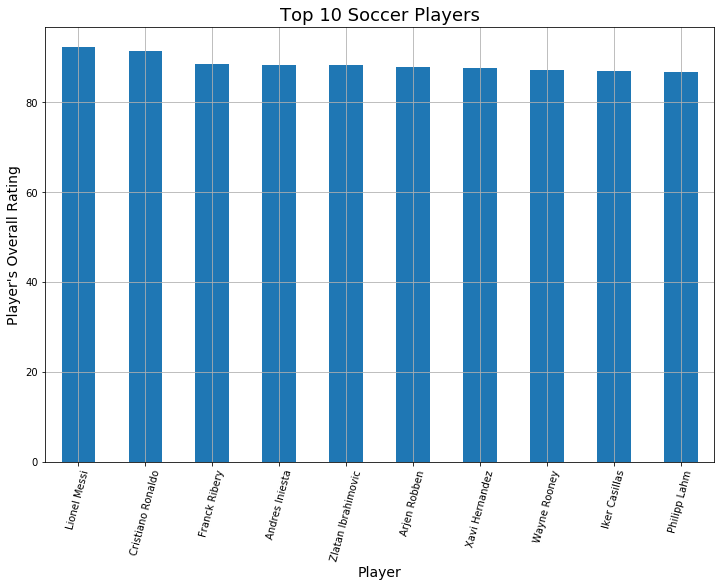

In [62]:
drawTop10BarChart(top10)

## Yearly Average Overall Rating: Messi Vs Ronaldo ##

In [71]:
#allDF.head()
allDF['year'] = pd.to_datetime(allDF['date'], format='%Y-%m-%d %H:%M:%S').dt.year
#allDF.head()
#type(allDF['date'][0])

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [72]:
yearlyAvgRating = allDF[['player_api_id', 'overall_rating', 'year']].groupby(['player_api_id', 'year'], as_index=False).mean()

In [78]:
yearlyAvgRating.head()

,player_api_id,year,overall_rating
0,2625,2007,63.0
1,2625,2008,60.0
2,2625,2010,60.0
3,2625,2011,58.5
4,2625,2012,58.0


In [87]:
#slice yearly overall ratings for only Ronaldo and Messi
yearlyRatings = yearlyAvgRating[(yearlyAvgRating['player_api_id']==ronaldoApiID) | (yearlyAvgRating['player_api_id'] == messiApiID)]

In [90]:
yearlyRatings

,player_api_id,year,overall_rating
13778,30893,2007,89.000000
13779,30893,2008,91.000000
13780,30893,2009,89.500000
13781,30893,2010,89.000000
13782,30893,2011,90.500000
13783,30893,2012,92.000000
13784,30893,2013,92.000000
13785,30893,2014,92.000000
13786,30893,2015,92.600000
14272,30981,2007,85.500000


In [92]:
yearlyRatings = playersDF.merge(yearlyRatings, on='player_api_id', how='inner')

In [93]:
yearlyRatings.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,year,overall_rating
0,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,2007,89.0
1,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,2008,91.0
2,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,2009,89.5
3,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,2010,89.0
4,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,2011,90.5


In [94]:
#Check null data values
yearlyRatings.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
year                  0
overall_rating        0
dtype: int64

In [95]:
yearlyRatings = yearlyRatings[['player_name', 'year', 'overall_rating']]

In [96]:
yearlyRatings

,player_name,year,overall_rating
0,Cristiano Ronaldo,2007,89.000000
1,Cristiano Ronaldo,2008,91.000000
2,Cristiano Ronaldo,2009,89.500000
3,Cristiano Ronaldo,2010,89.000000
4,Cristiano Ronaldo,2011,90.500000
5,Cristiano Ronaldo,2012,92.000000
6,Cristiano Ronaldo,2013,92.000000
7,Cristiano Ronaldo,2014,92.000000
8,Cristiano Ronaldo,2015,92.600000
9,Lionel Messi,2007,85.500000


In [100]:
yearlyRatings.isnull().any()
yearlyRatings.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [102]:
yearlyRatings['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [123]:
def drawYearlyRatingsChart(df):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    plt.title('Yearly Overall Ratings for Ronaldo Vs Messi', size=18)
    labels = ['Ronaldo', 'Messi']
    ax = df[df['player_name']=='Cristiano Ronaldo'].plot(ax=ax, kind='line', x='year', y='overall_rating')
    ax = df[df['player_name'] == 'Lionel Messi'].plot(ax=ax, kind='line', x='year', y='overall_rating')
    plt.ylabel('Overall Rating', size=14)
    plt.xlabel('Year', size=14)

    ax.set_xticklabels(df['year'].unique(), rotation=75)
    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best', prop={'size':14})
    plt.grid(True)
    plt.show()

    #yearlyRatings.plot(x='year', y='overall_rating', figsize=(12, 8), grid=True)

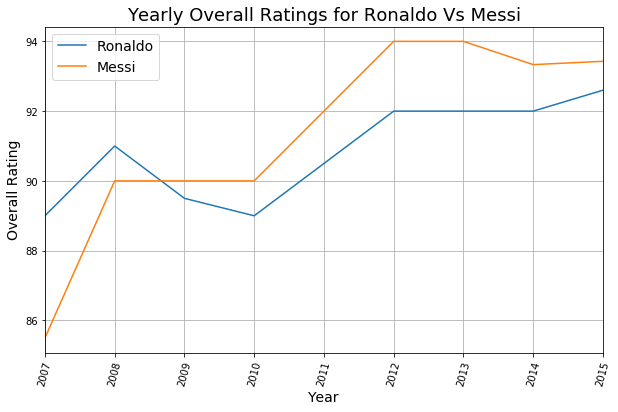

In [124]:
# draw the chart
drawYearlyRatingsChart(yearlyRatings)